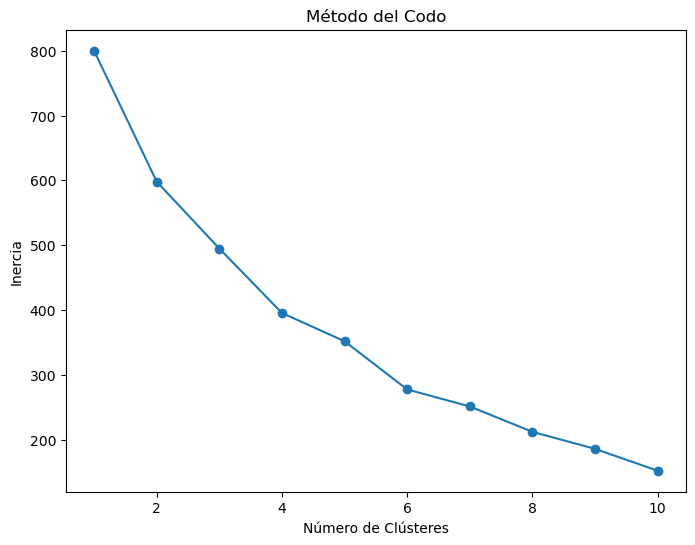

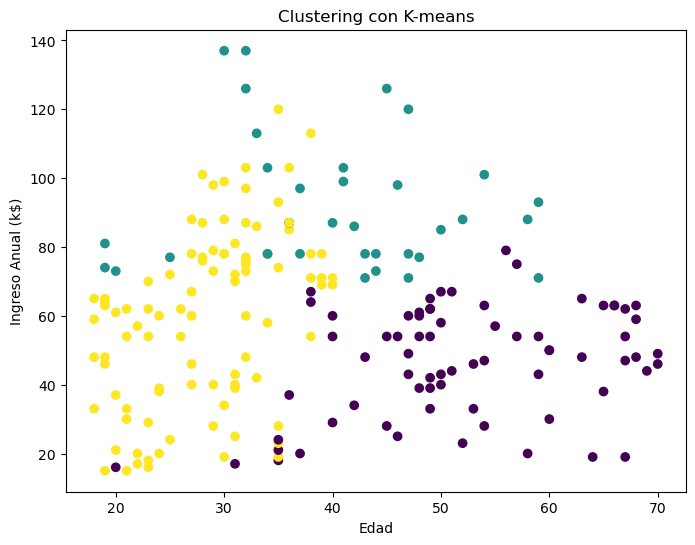

Coeficiente de Silhouette: 0.2576199805135528
Índice de Calinski-Harabasz: 60.75505818806426
Índice de Davies-Bouldin: 1.4248671516594265


In [11]:

import os
# Configurar la variable de entorno para evitar la fuga de memoria
os.environ["OMP_NUM_THREADS"] = '1'

# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt


# Cargar el archivo CSV
file_path = 'Anexo 5Mall_Customers.csv'
data = pd.read_csv(file_path)

# Eliminar la columna irrelevante 'CustomerID'
data_cleaned = data.drop(columns=['CustomerID'])

# Codificar la variable categórica 'Gender' (de 'Male'/'Female' a 0/1)
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

# Escalar las variables numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Crear un DataFrame con los datos escalados para referencia (opcional)
scaled_df = pd.DataFrame(scaled_data, columns=data_cleaned.columns)

# Ver los primeros registros de los datos escalados (esto también verifica que scaled_data esté bien definido)
# print(scaled_df.head())

# Método del Codo: Calcular la inercia para diferentes valores de k
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # Ahora debería funcionar, ya que scaled_data está definido
    inertia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.show()

# Elegir el número óptimo de clústeres (por ejemplo, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Agregar las etiquetas de clúster al DataFrame
data_cleaned['KMeans_Cluster'] = kmeans_labels

# Visualización de los resultados
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Age'], data_cleaned['Annual Income (k$)'], c=data_cleaned['KMeans_Cluster'], cmap='viridis')
plt.title('Clustering con K-means')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

# Calcular el Coeficiente de Silhouette
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print(f"Coeficiente de Silhouette: {silhouette_avg}")

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, kmeans_labels)
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_avg}")

# Calcular el Índice de Davies-Bouldin
davies_bouldin_avg = davies_bouldin_score(scaled_data, kmeans_labels)
print(f"Índice de Davies-Bouldin: {davies_bouldin_avg}")
